In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [17]:
(train_images,train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32')/255
test_images = test_images.reshape((10000, 28, 28,1)).astype('float32')/255


In [18]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1))) #input layer
model.add(layers.Dense(128, activation='relu')) #Hidden Layer with Relu activation
model.add(layers.Dense(64, activation='relu'))  #Additional Layer with Relu activation
model.add(layers.Dense(10, activation='softmax'))  #output layer with softmax activation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8453 - loss: 0.5433 - val_accuracy: 0.9588 - val_loss: 0.1430
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9608 - loss: 0.1316 - val_accuracy: 0.9607 - val_loss: 0.1239
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9739 - loss: 0.0880 - val_accuracy: 0.9698 - val_loss: 0.1002
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9806 - loss: 0.0631 - val_accuracy: 0.9725 - val_loss: 0.0939
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9851 - loss: 0.0499 - val_accuracy: 0.9710 - val_loss: 0.0994


In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("MNIST data Loaded and preprocessed successfully!")
print("train images shape:", train_images.shape)
print("test labesls shape:",test_labels.shape)
print(f'Test accuracy:{test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.1012
MNIST data Loaded and preprocessed successfully!
train images shape: (60000, 28, 28, 1)
test labesls shape: (10000, 10)
Test accuracy:0.9706000089645386


In [29]:
import numpy as np

In [31]:
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
prediction = model.predict(test_images)
print("Prediction for first test image:",np.argmax(predictions[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediction for first test image: 7


In [33]:
print("ACTUAL LABELS:", np.argmax(test_labels[0]))

ACTUAL LABELS: 7


In [34]:
import matplotlib.pyplot as plt


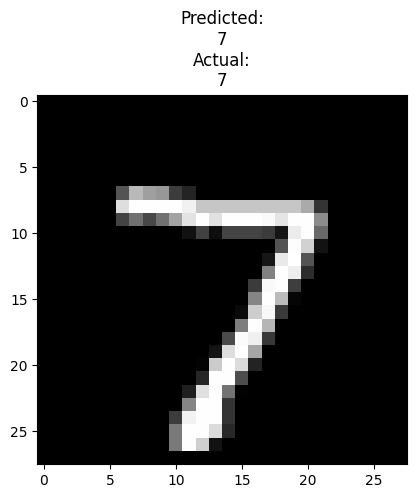

In [36]:
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted:\n{np.argmax(predictions[0])}\nActual:\n{np.argmax(test_labels[0])}')
plt.show()